# Methylation of Genomic Features

In [2]:
library(tidyverse)
library(dplyr)
library(stringr)
library(rtracklayer)
library(tibble)

library(ggvenn)

generate counts matrix for CG motifs, look for overlap with genomic features

we're looking at just where is methylation occuring in my samples

In [2]:
!CG_motif="/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_methyl_assembly/assembly_pipeline_files/genomic_bed_files/C_virginica-3.0_CG-motif.bed"

!input_dir="/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_methyl_assembly/assembly_pipeline_files/BEDtools/working_BAM_sequences"

!output_dir="/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_methyl_assembly/assembly_pipeline_files/BEDtools/CG_coverage/"

In [ ]:
!bedtools multicov -bams *.bam -bed $CG_motif > ${output_dir}CG_coverage.csv

read in genomic features BED files

In [ ]:
CG_motif

# Methylation level 
Determining the methylation level of CpG dinucleotides and gene regions. To do this, I'm going to use `bedtools multicov` to generate coverage files for each sample with bed files of the different gene features. Then, calculate the number of features with methylation and number without to get our methylation level.

In [ ]:
output_dir="/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_methyl_assembly/assembly_pipeline_files/genomic_bed_files/CpG_multicov/"
input_dir="/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_methyl_assembly/assembly_pipeline_files/BEDtools/working_BAM_sequences/"

In [ ]:
# hypoxic control
!HC_files=("2018--BBB-WBO-B21-CV_sorted.bam" "2018--BBB-WBV-B70-CV_sorted.bam" "2018--BBO-WBO-B16-CV_sorted.bam" "2018--BBO-WBV-B64-CV_sorted.bam" "2018--BBY-WBG-B42-CV_sorted.bam")

# control hypoxic
!CH_files=("2018--WBG-BBB-W56-CV_sorted.bam" "2018--WBO-BBR-W03-CV_sorted.bam" "2018--WBR-BBY-W25-CV_sorted.bam" "2018--WBY-BBV-W65-CV_sorted.bam" "2018--WBY-BBY-W30-CV_sorted.bam")

# hypoxic hypoxic 
!HH_files=("2018--BBO-BBO-B16-CV_sorted.bam" "2018--BBO-BBY-B27-CV_sorted.bam" "2018--BBR-BBB-B50-CV_sorted.bam" "2018--BBR-BBG-B38-CV_sorted.bam" "2018--BBR-BBY-B26-CV_sorted.bam")

# control control
!CC_files=("2018--WBB-WBV-W69-CV_sorted.bam" "2018--WBG-WBG-W44-CV_sorted.bam" "2018--WBO-WBV-W64-CV_sorted.bam" "2018--WBV-WBO-W23-CV_sorted.bam" "2018--WBV-WBR-W12-CV_sorted.bam") 


generate coverage file/counts matrix for each set of samples

# CpG dinucleotides

In [51]:
CG_multicov <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_methyl_assembly/assembly_pipeline_files/genomic_bed_files/CpG_multicov/CG_motif_multicov.csv', sep='\t')
dim(CG_multicov)
head(CG_multicov)

[1] 14458702       24

,NC_035780.1,X28,X30,CG_motif,X0,X0.1,X0.2,X0.3,X0.4,X0.5,⋯,X0.10,X0.11,X0.12,X0.13,X0.14,X0.15,X0.16,X0.17,X0.18,X0.19
,<chr>,<int>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,NC_035780.1,54,56,CG_motif,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
2,NC_035780.1,75,77,CG_motif,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
3,NC_035780.1,93,95,CG_motif,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
4,NC_035780.1,103,105,CG_motif,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
5,NC_035780.1,116,118,CG_motif,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
6,NC_035780.1,134,136,CG_motif,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [110]:
bam_files <- dir(path = "/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_methyl_assembly/assembly_pipeline_files/BEDtools/working_BAM_sequences/", pattern = "^.*\\.bam$", full.names = FALSE, ignore.case = TRUE, all.files = TRUE)
bam_files

[1] "2018--BBB-WBO-B21-CV_sorted.bam" "2018--BBB-WBV-B70-CV_sorted.bam"
 [3] "2018--BBO-BBO-B16-CV_sorted.bam" "2018--BBO-BBY-B27-CV_sorted.bam"
 [5] "2018--BBO-WBO-B16-CV_sorted.bam" "2018--BBO-WBV-B64-CV_sorted.bam"
 [7] "2018--BBR-BBB-B50-CV_sorted.bam" "2018--BBR-BBG-B38-CV_sorted.bam"
 [9] "2018--BBR-BBY-B26-CV_sorted.bam" "2018--BBY-WBG-B42-CV_sorted.bam"
[11] "2018--WBB-WBV-W69-CV_sorted.bam" "2018--WBG-BBB-W56-CV_sorted.bam"
[13] "2018--WBG-WBG-W44-CV_sorted.bam" "2018--WBO-BBR-W03-CV_sorted.bam"
[15] "2018--WBO-WBV-W64-CV_sorted.bam" "2018--WBR-BBY-W25-CV_sorted.bam"
[17] "2018--WBV-WBO-W23-CV_sorted.bam" "2018--WBV-WBR-W12-CV_sorted.bam"
[19] "2018--WBY-BBV-W65-CV_sorted.bam" "2018--WBY-BBY-W30-CV_sorted.bam"

In [111]:
# clean sample names
bam_files_clean <- gsub("^2018--|-CV_sorted\\.bam$", "", bam_files)
bam_files_clean

[1] "BBB-WBO-B21" "BBB-WBV-B70" "BBO-BBO-B16" "BBO-BBY-B27" "BBO-WBO-B16"
 [6] "BBO-WBV-B64" "BBR-BBB-B50" "BBR-BBG-B38" "BBR-BBY-B26" "BBY-WBG-B42"
[11] "WBB-WBV-W69" "WBG-BBB-W56" "WBG-WBG-W44" "WBO-BBR-W03" "WBO-WBV-W64"
[16] "WBR-BBY-W25" "WBV-WBO-W23" "WBV-WBR-W12" "WBY-BBV-W65" "WBY-BBY-W30"

In [112]:
colnames(CG_multicov) <- c('chromosome', 'start', 'stop', 'CG_motif', bam_files_clean)
head(CG_multicov)

,chromosome,start,stop,CG_motif,BBB-WBO-B21,BBB-WBV-B70,BBO-BBO-B16,BBO-BBY-B27,BBO-WBO-B16,BBO-WBV-B64,⋯,WBB-WBV-W69,WBG-BBB-W56,WBG-WBG-W44,WBO-BBR-W03,WBO-WBV-W64,WBR-BBY-W25,WBV-WBO-W23,WBV-WBR-W12,WBY-BBV-W65,WBY-BBY-W30
,<chr>,<int>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,NC_035780.1,54,56,CG_motif,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
2,NC_035780.1,75,77,CG_motif,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
3,NC_035780.1,93,95,CG_motif,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
4,NC_035780.1,103,105,CG_motif,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
5,NC_035780.1,116,118,CG_motif,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
6,NC_035780.1,134,136,CG_motif,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [113]:
# Base columns
base_cols <- CG_multicov[, c("chromosome", "start", "stop", "CG_motif")]

########################################################################
## HYPOXIC CONTROL

# Additional columns matching pattern
HC_cols <- CG_multicov[, grepl("BB.-WB.-\\w{3}", names(CG_multicov))]

# Create new data frame
HC_multicov <- cbind(base_cols, HC_cols)

write.csv(HC_multicov, "/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_methyl_assembly/assembly_pipeline_files/genomic_bed_files/CpG_multicov/HC_CpGmulticov.csv")

########################################################################
## HYPOXIC HYPOXIC

# Additional columns matching pattern
HH_cols <- CG_multicov[, grepl("BB.-BB.-\\w{3}", names(CG_multicov))]

# Create new data frame
HH_multicov <- cbind(base_cols, HH_cols)

write.csv(HH_multicov, "/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_methyl_assembly/assembly_pipeline_files/genomic_bed_files/CpG_multicov/HH_CpGmulticov.csv")

########################################################################
## CONTROL HYPOXIC

# Additional columns matching pattern
CH_cols <- CG_multicov[, grepl("WB.-BB.-\\w{3}", names(CG_multicov))]

# Create new data frame
CH_multicov <- cbind(base_cols, CH_cols)

write.csv(CH_multicov, "/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_methyl_assembly/assembly_pipeline_files/genomic_bed_files/CpG_multicov/CH_CpGmulticov.csv")

########################################################################
# CONTROL CONTROL

# Additional columns matching pattern
CC_cols <- CG_multicov[, grepl("WB.-WB.-\\w{3}", names(CG_multicov))]

# Create new data frame
CC_multicov <- cbind(base_cols, CC_cols)

write.csv(CC_multicov, "/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_methyl_assembly/assembly_pipeline_files/genomic_bed_files/CpG_multicov/CC_CpGmulticov.csv")

########################################################################
head(HC_multicov)
head(HH_multicov)
head(CH_multicov)
head(CC_multicov)

,chromosome,start,stop,CG_motif,BBB-WBO-B21,BBB-WBV-B70,BBO-WBO-B16,BBO-WBV-B64,BBY-WBG-B42
,<chr>,<int>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>
1,NC_035780.1,54,56,CG_motif,0,0,0,0,0
2,NC_035780.1,75,77,CG_motif,0,0,0,0,0
3,NC_035780.1,93,95,CG_motif,0,0,0,0,0
4,NC_035780.1,103,105,CG_motif,0,0,0,0,0
5,NC_035780.1,116,118,CG_motif,0,0,0,0,0
6,NC_035780.1,134,136,CG_motif,0,0,0,0,0


,chromosome,start,stop,CG_motif,BBO-BBO-B16,BBO-BBY-B27,BBR-BBB-B50,BBR-BBG-B38,BBR-BBY-B26
,<chr>,<int>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>
1,NC_035780.1,54,56,CG_motif,0,0,0,0,0
2,NC_035780.1,75,77,CG_motif,0,0,0,0,0
3,NC_035780.1,93,95,CG_motif,0,0,0,0,0
4,NC_035780.1,103,105,CG_motif,0,0,0,0,0
5,NC_035780.1,116,118,CG_motif,0,0,0,0,0
6,NC_035780.1,134,136,CG_motif,0,0,0,0,0


,chromosome,start,stop,CG_motif,WBG-BBB-W56,WBO-BBR-W03,WBR-BBY-W25,WBY-BBV-W65,WBY-BBY-W30
,<chr>,<int>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>
1,NC_035780.1,54,56,CG_motif,0,0,0,0,0
2,NC_035780.1,75,77,CG_motif,0,0,0,0,0
3,NC_035780.1,93,95,CG_motif,0,0,0,0,0
4,NC_035780.1,103,105,CG_motif,0,0,0,0,0
5,NC_035780.1,116,118,CG_motif,0,0,0,0,0
6,NC_035780.1,134,136,CG_motif,0,0,0,0,0


,chromosome,start,stop,CG_motif,WBB-WBV-W69,WBG-WBG-W44,WBO-WBV-W64,WBV-WBO-W23,WBV-WBR-W12
,<chr>,<int>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>
1,NC_035780.1,54,56,CG_motif,0,0,0,0,0
2,NC_035780.1,75,77,CG_motif,0,0,0,0,0
3,NC_035780.1,93,95,CG_motif,0,0,0,0,0
4,NC_035780.1,103,105,CG_motif,0,0,0,0,0
5,NC_035780.1,116,118,CG_motif,0,0,0,0,0
6,NC_035780.1,134,136,CG_motif,0,0,0,0,0


## Calculating methylation level of CpGs by sample

General pipeline:
1. Grab the 5 columns for each replicate in the 'big' data frame
2. Only keep the CpGs that have at least 5 sequences for that replicate (choosing 5 based on 5x coverage used in Ventakamaran et al 2022) - calculate how many rows are kept 
3. Calculate methylation level based on this calculation: (methylated exons/total exons)x100

IF ALREADY RAN CODE ONCE, skip to bottom and load CSV

**control control**

In [129]:
head(CC_multicov)

,chromosome,start,stop,CG_motif,WBB-WBV-W69,WBG-WBG-W44,WBO-WBV-W64,WBV-WBO-W23,WBV-WBR-W12,avg_counts
,<chr>,<int>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<dbl>
1,NC_035780.1,54,56,CG_motif,0,0,0,0,0,0
2,NC_035780.1,75,77,CG_motif,0,0,0,0,0,0
3,NC_035780.1,93,95,CG_motif,0,0,0,0,0,0
4,NC_035780.1,103,105,CG_motif,0,0,0,0,0,0
5,NC_035780.1,116,118,CG_motif,0,0,0,0,0,0
6,NC_035780.1,134,136,CG_motif,0,0,0,0,0,0


In [130]:
CCsample_columns <- CC_multicov[, 5:9] # Select the sample columns

# Calculate the number of rows with at least 5 for each sample
ML_cc <- colSums(CCsample_columns >= 5)

# Print the result
ML_cc

WBB-WBV-W69 WBG-WBG-W44 WBO-WBV-W64 WBV-WBO-W23 WBV-WBR-W12 
     147798       59287      137931       81789       33975

In [133]:
total_cg <- dim(CC_multicov)[1]
total_cg

[1] 14458702

In [135]:
# create dataframe 
CCml_cpg <- as.data.frame(ML_cc)


# assign replicate #'s
CCml_cpg$replicate <- c(1,2,3,4,5)

# rename columns
colnames(CCml_cpg) <- c('methyl_count', 'replicate')

# reset rownames
rownames(CCml_cpg) <- NULL

# add treatment
CCml_cpg$treatment <- 'CC'

CCml_cpg

methyl_count,replicate,treatment
<dbl>,<dbl>,<chr>
147798,1,CC
59287,2,CC
137931,3,CC
81789,4,CC
33975,5,CC


In [143]:
# calculate methylation level
CCml_cpg$methyl_level <- round(((CCml_cpg$methyl_count/total_cg)*100),3)

# reorder columns to make sense
#CCml_cpg <- select(CCml_cpg, treatment, replicate, methyl_count, methyl_level)

CCml_cpg

methyl_count,replicate,treatment,methyl_level
<dbl>,<dbl>,<chr>,<dbl>
147798,1,CC,1.022
59287,2,CC,0.410
137931,3,CC,0.954
81789,4,CC,0.566
33975,5,CC,0.235


**control hypoxic**

In [137]:
head(CH_multicov)

,chromosome,start,stop,CG_motif,WBG-BBB-W56,WBO-BBR-W03,WBR-BBY-W25,WBY-BBV-W65,WBY-BBY-W30,avg_counts
,<chr>,<int>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<dbl>
1,NC_035780.1,54,56,CG_motif,0,0,0,0,0,0
2,NC_035780.1,75,77,CG_motif,0,0,0,0,0,0
3,NC_035780.1,93,95,CG_motif,0,0,0,0,0,0
4,NC_035780.1,103,105,CG_motif,0,0,0,0,0,0
5,NC_035780.1,116,118,CG_motif,0,0,0,0,0,0
6,NC_035780.1,134,136,CG_motif,0,0,0,0,0,0


In [139]:
CHsample_columns <- CH_multicov[,5:9] # Select the sample columns

# Calculate the number of rows with at least 5 for each sample
ML_ch <- colSums(CHsample_columns >= 5)

# Print the result
ML_ch

WBG-BBB-W56 WBO-BBR-W03 WBR-BBY-W25 WBY-BBV-W65 WBY-BBY-W30 
     140077       24101       73538      136233      104170

In [140]:
# create dataframe 
CHml_cg <- as.data.frame(ML_ch)

# assign replicate #'s
CHml_cg$replicate <- c(1,2,3,4,5)

# rename columns
colnames(CHml_cg) <- c('methyl_count', 'replicate')

# reset rownames
rownames(CHml_cg) <- NULL

# add treatment
CHml_cg$treatment <- 'CH'

CHml_cg

methyl_count,replicate,treatment
<dbl>,<dbl>,<chr>
140077,1,CH
24101,2,CH
73538,3,CH
136233,4,CH
104170,5,CH


In [142]:
# calculate methylation level
CHml_cg$methyl_level <- round(((CHml_cg$methyl_count/total_cg)*100),3)

# reorder columns to make sense
#CHml_cg <- select(CHml_cg, treatment, replicate, methyl_count, methyl_level)

CHml_cg

methyl_count,replicate,treatment,methyl_level
<dbl>,<dbl>,<chr>,<dbl>
140077,1,CH,0.969
24101,2,CH,0.167
73538,3,CH,0.509
136233,4,CH,0.942
104170,5,CH,0.720


**hypoxic hypoxic**

In [144]:
HHsample_columns <- HH_multicov[,5:9] # Select the sample columns

# Calculate the number of rows with at least 5 for each sample
ML_hh <- colSums(HHsample_columns >= 5)

# Print the result
ML_hh

BBO-BBO-B16 BBO-BBY-B27 BBR-BBB-B50 BBR-BBG-B38 BBR-BBY-B26 
     132674      105032      104681      134384      129732

In [145]:
# create dataframe 
HHml_cg <- as.data.frame(ML_hh)

# assign replicate #'s
HHml_cg$replicate <- c(1,2,3,4,5)

# rename columns
colnames(HHml_cg) <- c('methyl_count', 'replicate')

# reset rownames
rownames(HHml_cg) <- NULL

# add treatment
HHml_cg$treatment <- 'HH'

HHml_cg

methyl_count,replicate,treatment
<dbl>,<dbl>,<chr>
132674,1,HH
105032,2,HH
104681,3,HH
134384,4,HH
129732,5,HH


In [146]:
# calculate methylation level
HHml_cg$methyl_level <- round(((HHml_cg$methyl_count/total_cg)*100),3)

# reorder columns to make sense
HHml_cg <- select(HHml_cg, treatment, replicate, methyl_count, methyl_level)

HHml_cg

treatment,replicate,methyl_count,methyl_level
<chr>,<dbl>,<dbl>,<dbl>
HH,1,132674,0.918
HH,2,105032,0.726
HH,3,104681,0.724
HH,4,134384,0.929
HH,5,129732,0.897


**hypoxic control**

In [153]:
HCsample_columns <- HC_multicov[, 5:9] # Select the sample columns

# Calculate the number of rows with at least 5 for each sample
ML_hc <- colSums(HCsample_columns >= 5)

# Print the result
ML_hc

BBB-WBO-B21 BBB-WBV-B70 BBO-WBO-B16 BBO-WBV-B64 BBY-WBG-B42 
     138394      136261      149013      136293       67842

In [154]:
# create dataframe 
HCml_cg <- as.data.frame(ML_hc)

# assign replicate #'s
HCml_cg$replicate <- c(1,2,3,4,5)

# rename columns
colnames(HCml_cg) <- c('methyl_count', 'replicate')

# reset rownames
rownames(HCml_cg) <- NULL

# add treatment
HCml_cg$treatment <- 'HC'

HCml_cg

methyl_count,replicate,treatment
<dbl>,<dbl>,<chr>
138394,1,HC
136261,2,HC
149013,3,HC
136293,4,HC
67842,5,HC


In [155]:
# calculate methylation level
HCml_cg$methyl_level <- round(((HCml_cg$methyl_count/total_cg)*100),2)

# reorder columns to make sense
#HCml_cg <- select(HCml_cg, treatment, replicate, methyl_count, methyl_level)

HCml_cg

methyl_count,replicate,treatment,methyl_level
<dbl>,<dbl>,<chr>,<dbl>
138394,1,HC,0.96
136261,2,HC,0.94
149013,3,HC,1.03
136293,4,HC,0.94
67842,5,HC,0.47


In [156]:
cg_meLevel <- rbind(CCml_cpg, CHml_cg, HCml_cg, HHml_cg)
cg_meLevel

methyl_count,replicate,treatment,methyl_level
<dbl>,<dbl>,<chr>,<dbl>
147798,1,CC,1.022
59287,2,CC,0.410
137931,3,CC,0.954
81789,4,CC,0.566
33975,5,CC,0.235
140077,1,CH,0.969
24101,2,CH,0.167
73538,3,CH,0.509
136233,4,CH,0.942


In [125]:
# create csv to avoid running long code above
write.csv(cg_meLevel, '/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/genomic_feature_tracks/methylation_level/CpG_meLevel.csv')

IF ALREADY RAN ABOVE CODE just load in csv:

In [20]:
cg_meLevel <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/genomic_feature_tracks/methylation_level/CpG_meLevel.csv')

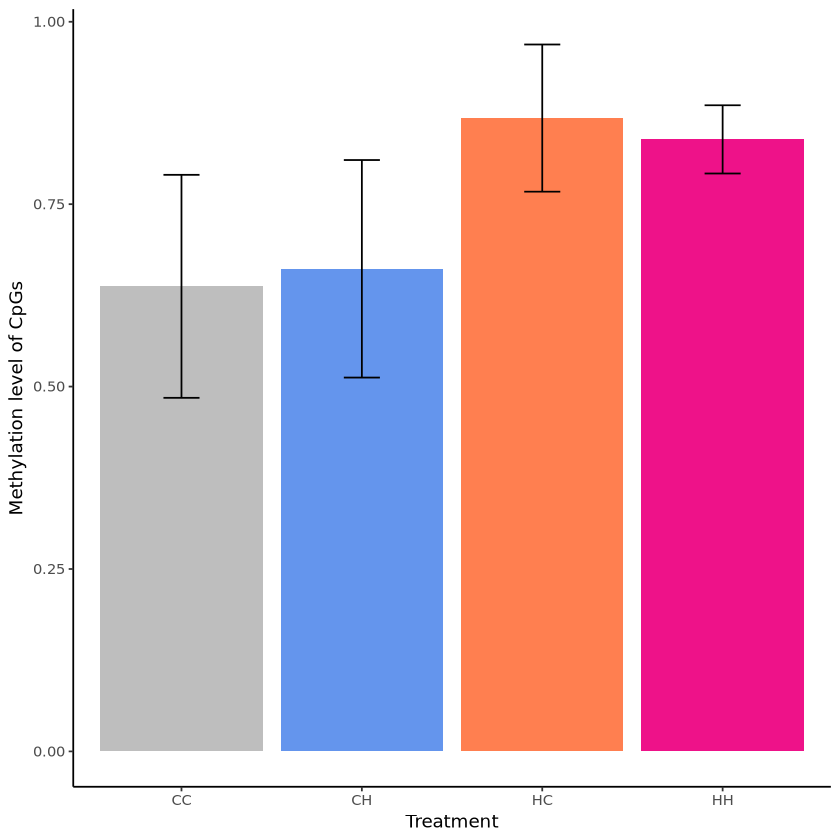

In [157]:
df_summary <- cg_meLevel %>%
  group_by(treatment) %>%
  summarise(
    mean_methyl_level = mean(methyl_level),
    sd_methyl_level = sd(methyl_level),
    se_methyl_level = sd_methyl_level / sqrt(n())
  )

# Create a bar plot with error bars
cpgMe_barplot <- ggplot(df_summary, aes(x = treatment, y = mean_methyl_level, fill = treatment)) +
  geom_bar(stat = "identity") +
  geom_errorbar(aes(ymax = mean_methyl_level + se_methyl_level,
                       ymin = mean_methyl_level - se_methyl_level),
                  width = 0.2, size = 0.5) +
#scale_fill_brewer(palette = "RdPu", direction = 1) +
scale_fill_manual(values=c('gray', 'cornflowerblue', 'coral','deeppink2')) +
guides(fill = FALSE) +
  labs(x = "Treatment", y = "Methylation level of CpGs") +
  theme_classic()

cpgMe_barplot

In [128]:
ggsave('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/figures/cpgMe_barplot.pdf', cpgMe_barplot)

Saving 6.67 x 6.67 in image


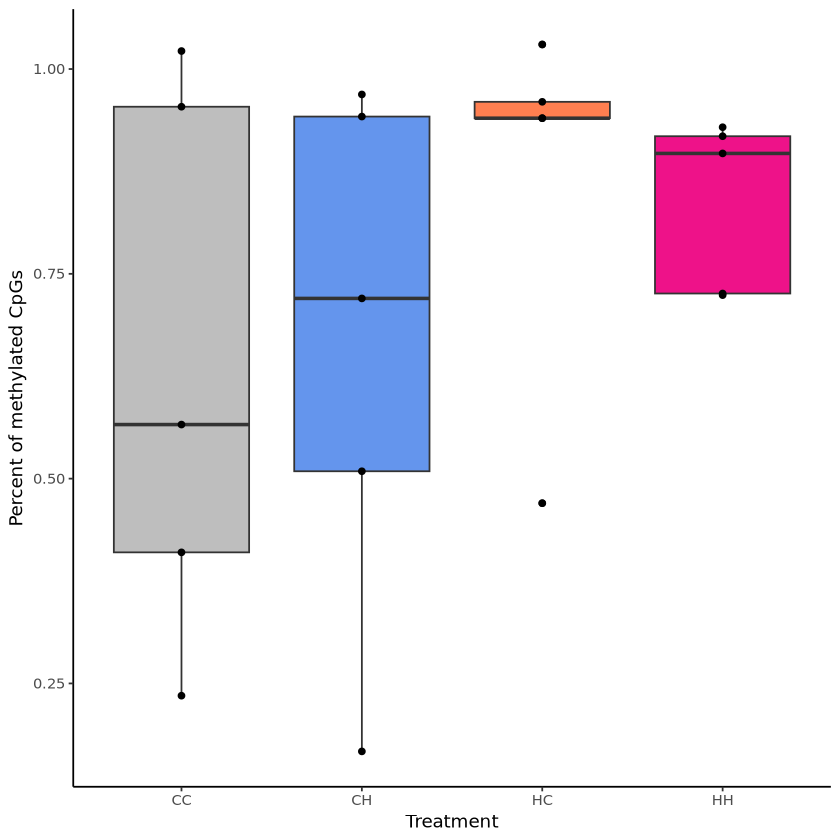

In [159]:
cpgMe_boxplot <- ggplot(cg_meLevel, aes(x = treatment, y = methyl_level, fill = treatment)) +
  geom_boxplot() +
geom_point() +
#scale_fill_brewer(palette = "RdPu", direction = 1) +
scale_fill_manual(values=c('gray', 'cornflowerblue', 'coral','deeppink2')) +
guides(fill=FALSE) +
  labs(x = "Treatment", y = "Percent of methylated CpGs") +
  theme_classic()

cpgMe_boxplot

In [45]:
ggsave('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/figures/cpgMe_boxplot.pdf', cpgMe_boxplot)

Saving 6.67 x 6.67 in image


### ANOVA of CpG methylation
want to know if the differences in CpG methylation between treatments is statistically significant

following pipeline [here](https://www.sthda.com/english/wiki/one-way-anova-test-in-r)

In [89]:
# make copy of df
cpg <- cg_meLevel

# set levels
cpg$treatment <- ordered(cpg$treatment,
                           levels = c('CC', 'CH', 'HC', 'HH'))

levels(cpg$treatment)

[1] "CC" "CH" "HC" "HH"

In [90]:
# summary statistics
group_by(cpg, treatment) %>%
summarise(count = n(),
          mean = mean(methyl_level, na.rm=TRUE),
          sd = sd(methyl_level, na.rm=TRUE)
          )

treatment,count,mean,sd
<ord>,<int>,<dbl>,<dbl>
CC,5,0.636,0.3414381
CH,5,0.662,0.3319187
HC,5,0.868,0.2255438
HH,5,0.840,0.1055936


In [91]:
res.aov <- aov(methyl_level ~ treatment, data = cpg)
summary(res.aov)

            Df Sum Sq Mean Sq F value Pr(>F)
treatment    3 0.2138 0.07126   0.987  0.424
Residuals   16 1.1551 0.07219               

In [92]:
TukeyHSD(res.aov)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = methyl_level ~ treatment, data = cpg)

$treatment
        diff        lwr       upr     p adj
CH-CC  0.026 -0.4601798 0.5121798 0.9986682
HC-CC  0.232 -0.2541798 0.7181798 0.5374580
HH-CC  0.204 -0.2821798 0.6901798 0.6353007
HC-CH  0.206 -0.2801798 0.6921798 0.6282900
HH-CH  0.178 -0.3081798 0.6641798 0.7248713
HH-HC -0.028 -0.5141798 0.4581798 0.9983394


**check the homogeneity of variance assumption**

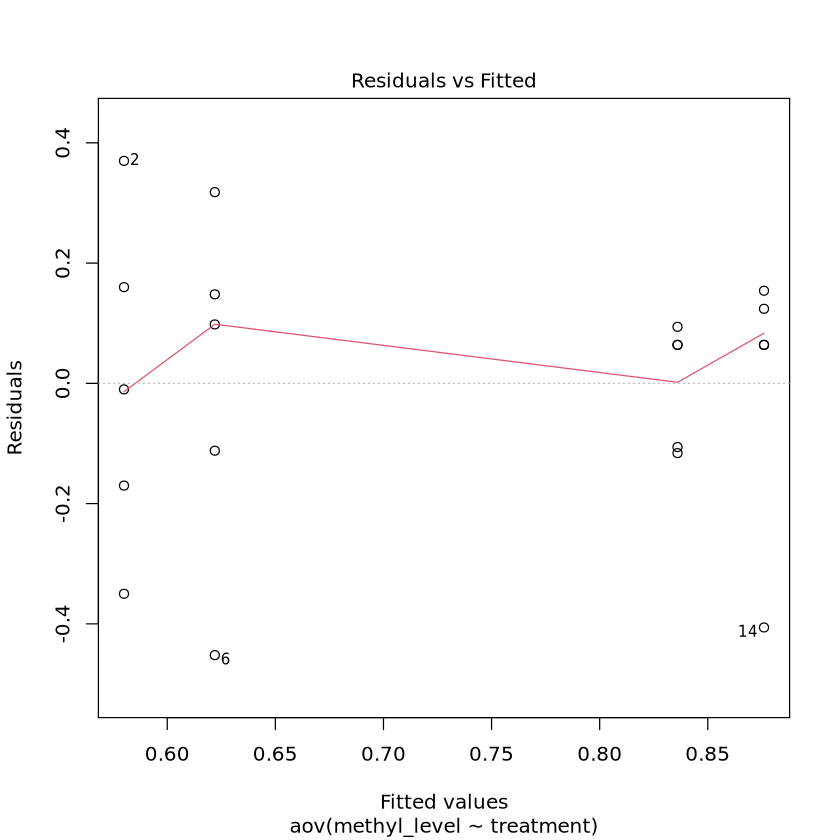

In [136]:
plot(res.aov,1)

In [137]:
leveneTest(methyl_level ~ treatment, data = cpg)

ERROR: Error in leveneTest(methyl_level ~ treatment, data = cpg): could not find function "leveneTest"


from [source](https://www.sthda.com/english/wiki/one-way-anova-test-in-r): "...the p-value is not less than the significance level of 0.05. This means that there is no evidence to suggest that the variance across groups is statistically significantly different. Therefore, we can assume the homogeneity of variances in the different treatment groups."

**check the normality assumption**

In [ ]:
plot(res.aov, 2)

# Extract the residuals
aov_residuals <- residuals(object = res.aov )
# Run Shapiro-Wilk test
shapiro.test(x = aov_residuals )

so no statistically significant differences of methlyation levels for CpG dinucleotides between treatments

#### fixing ANOVA
after talking to SGW 12/5 - need to split phase 1 and 2 and look at the interaction of the two - bc some oysters experienced the same treatment in either phase 1 or 2

### two-way ANOVA of CpG methylation

In [162]:
cpg <- cg_meLevel
head(cpg)

,methyl_count,replicate,treatment,methyl_level
,<dbl>,<dbl>,<chr>,<dbl>
1,147798,1,CC,1.022
2,59287,2,CC,0.410
3,137931,3,CC,0.954
4,81789,4,CC,0.566
5,33975,5,CC,0.235
6,140077,1,CH,0.969


In [163]:
# for loop to assign phase 1 and phase 2 treatments based on the treatment column
cpg <- cpg %>%
  mutate(phase1 = ifelse(str_sub(treatment, 1, 1) == "C", "control", "hypoxia"),
         phase2 = ifelse(str_sub(treatment, 2, 2) == "H", "hypoxia", "control"))

cpg

methyl_count,replicate,treatment,methyl_level,phase1,phase2
<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>
147798,1,CC,1.022,control,control
59287,2,CC,0.410,control,control
137931,3,CC,0.954,control,control
81789,4,CC,0.566,control,control
33975,5,CC,0.235,control,control
140077,1,CH,0.969,control,hypoxia
24101,2,CH,0.167,control,hypoxia
73538,3,CH,0.509,control,hypoxia
136233,4,CH,0.942,control,hypoxia


In [170]:
# running a two-way ANOVA
model <- aov(methyl_level ~ phase1 * phase2, data = cpg)
summary(model)

              Df Sum Sq Mean Sq F value Pr(>F)
phase1         1 0.2081 0.20808   2.874  0.109
phase2         1 0.0000 0.00003   0.000  0.983
phase1:phase2  1 0.0035 0.00354   0.049  0.828
Residuals     16 1.1585 0.07241               

#### **Tukey Honestly Significant Difference (HSD)** post hoc test 
compares the means of multiple groups

In [171]:
TukeyHSD(model)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = methyl_level ~ phase1 * phase2, data = cpg)

$phase1
                 diff         lwr       upr     p adj
hypoxia-control 0.204 -0.05110653 0.4591065 0.1094039

$phase2
                   diff        lwr       upr     p adj
hypoxia-control -0.0026 -0.2577065 0.2525065 0.9830296

$`phase1:phase2`
                                   diff        lwr       upr     p adj
hypoxia:control-control:control  0.2306 -0.2563014 0.7175014 0.5434766
control:hypoxia-control:control  0.0240 -0.4629014 0.5109014 0.9989556
hypoxia:hypoxia-control:control  0.2014 -0.2855014 0.6883014 0.6454466
control:hypoxia-hypoxia:control -0.2066 -0.6935014 0.2803014 0.6272595
hypoxia:hypoxia-hypoxia:control -0.0292 -0.5161014 0.4577014 0.9981269
hypoxia:hypoxia-control:hypoxia  0.1774 -0.3095014 0.6643014 0.7277601


**main effects:**
- phase 1 hypoxia has significantly higher methylation levels than phase 1 control
- no main effect from phase 2

**interaction effects**
- no interaction effects


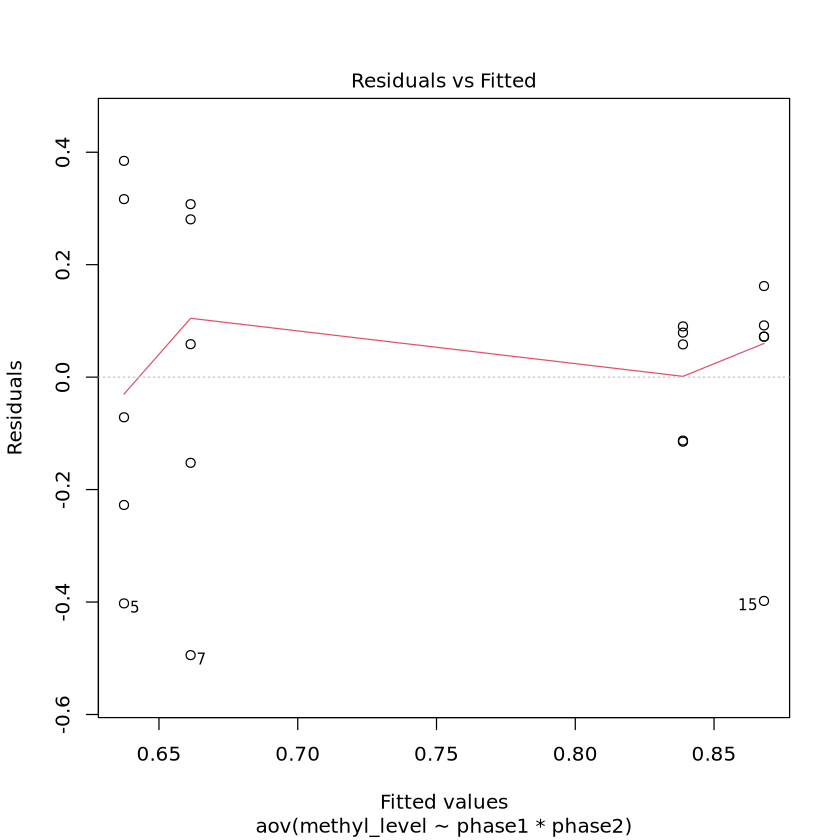

In [172]:
plot(model,1)


	Shapiro-Wilk normality test

data:  aov_residuals
W = 0.94512, p-value = 0.299


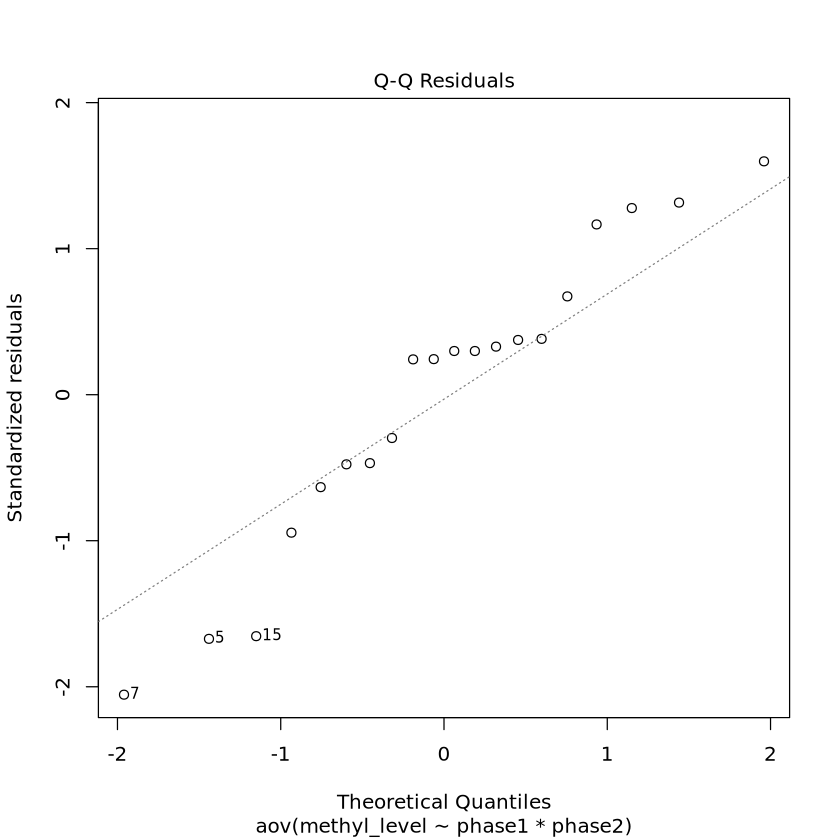

In [173]:
plot(model, 2)

# Extract the residuals
aov_residuals <- residuals(object = model )
# Run Shapiro-Wilk test
shapiro.test(x = aov_residuals )

# CpG methylation boxplot but faceted by second exposure

In [3]:
cpg <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/genomic_feature_tracks/methylation_level/CpG_meLevel.csv')
cpg <- cpg[,-1]
cpg

methyl_count,replicate,treatment,methyl_level
<int>,<int>,<chr>,<dbl>
59287,1,CC,0.41
137931,2,CC,0.95
81789,3,CC,0.57
33975,4,CC,0.23
107643,5,CC,0.74
24101,1,CH,0.17
73538,2,CH,0.51
136233,3,CH,0.94
104170,4,CH,0.72


In [4]:
# Assuming your data is in a dataframe called 'df'
cpg$phase1 <- ifelse(substr(cpg$treatment, 1, 1) == "C", "Control", "Hypoxic")
cpg$phase2 <- ifelse(substr(cpg$treatment, 2, 2) == "C", "Control", "Hypoxic")

cpg

methyl_count,replicate,treatment,methyl_level,phase1,phase2
<int>,<int>,<chr>,<dbl>,<chr>,<chr>
59287,1,CC,0.41,Control,Control
137931,2,CC,0.95,Control,Control
81789,3,CC,0.57,Control,Control
33975,4,CC,0.23,Control,Control
107643,5,CC,0.74,Control,Control
24101,1,CH,0.17,Control,Hypoxic
73538,2,CH,0.51,Control,Hypoxic
136233,3,CH,0.94,Control,Hypoxic
104170,4,CH,0.72,Control,Hypoxic


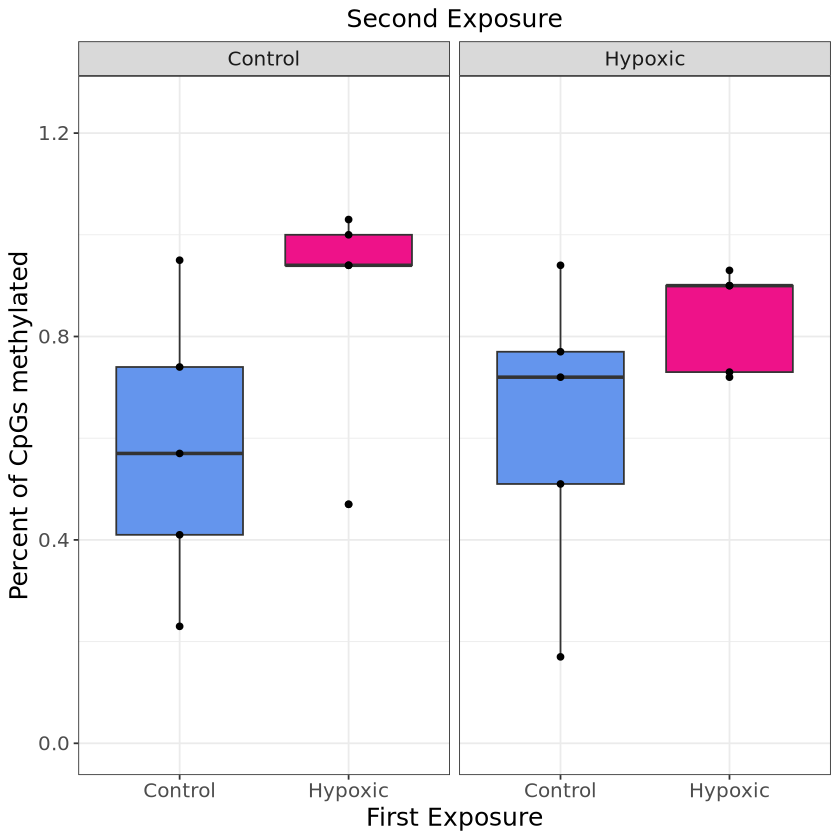

In [10]:
cpgBoxplot <- ggplot(cpg, aes(x = phase1, y = methyl_level, fill = phase1)) +
  geom_boxplot() +
  geom_point() +
  facet_wrap(~ phase2) +
  scale_fill_manual(values=c('cornflowerblue', 'deeppink2')) +
  guides(fill = 'none') +
ylim(0, 1.25) +
  labs(x = "First Exposure", y = "Percent of CpGs methylated", subtitle = "Second Exposure") +
  theme_bw() +
  theme(text = element_text(size = 15), plot.subtitle = element_text(hjust=0.5))

cpgBoxplot

In [11]:
ggsave('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/figures/cpgMe_boxplot_faceted.pdf', cpgBoxplot)

Saving 6.67 x 6.67 in image
